## Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

## Loading the Dataset

In [2]:
dataset = pd.read_csv("ex2data1.csv")
dataset.head()
# x1 marks in subject 1
# x2 marks in subject 2
# y --> {0,1} 0--> not admitted and 1 --> admitted  

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = dataset.iloc[:,0:2].values
y = dataset.iloc[:,-1].values

In [4]:
y = y.reshape(len(y),1)

## Plotting the Data

In [5]:
pos,neg = (np.where(y==1), np.where(y==0))

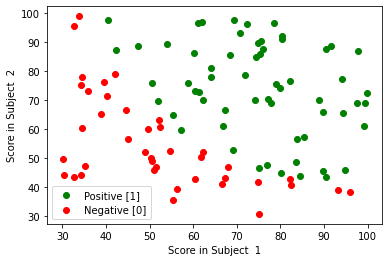

In [6]:
m1 = X[:,0] 
m2 = X[:,1]
plt.scatter(m1[pos[0]],m2[pos[0]],c='g',label='Positive [1]')
plt.scatter(m1[neg[0]],m2[neg[0]],c='r',label ='Negative [0]')
plt.xlabel("Score in Subject  1")
plt.ylabel("Score in Subject  2")
plt.legend()

## Test/Train split 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Training Logistic Classifier using training set 

In [8]:
from sklearn.linear_model import LogisticRegression
log_cls = LogisticRegression()
log_cls.fit(X_train,y_train)

/home/hari-cms/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [9]:
print(np.concatenate((y_test, log_cls.predict(X_test).reshape(len(y_test),1)),axis=1))

[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]]


## Accuracy of the classifier 
Accuracy of the classifier can be done in multiple ways but the standard and most effective one is to use **Confusion Matrix**.
* Precision predicts the accuracy of positive class
* Recall predicts how many positive class a classifier predicts among total number of positive class
* $$Confusion Matrix = \begin{bmatrix} TN & FP \\ FN & TP \end{bmatrix}$$
$\newline$
*  $$ Precision = \frac{TP} {TP+FP}$$
$\newline$
*  $$ Recall = \frac{TP} {TP+FN}$$

In [10]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test,log_cls.predict(X_test).reshape(len(y_test),1))

In [11]:
confusion_mat

array([[7, 1],
       [3, 9]])

In [12]:
from sklearn.metrics import precision_score, recall_score
presicion = precision_score(y_test,log_cls.predict(X_test).reshape(len(y_test),1))
recall = recall_score(y_test,log_cls.predict(X_test).reshape(len(y_test),1))

In [13]:
presicion 

0.9

In [14]:
recall # out of 12-->(9+3) positive targets, our classifier identified 9  

0.75